In [35]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv as df

from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [59]:
costdf = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

In [60]:
costdf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [61]:
costdf.shape

(1338, 7)

In [62]:
costdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
costdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
costdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
costdf["smoker_norm"]=map_smoking(costdf["smoker"])

In [68]:
nonnum_cols=[col for col in costdf.select_dtypes(include=["object"])]


In [69]:
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
costdf["obese"]=map_obese(costdf["bmi"])

In [70]:
costdf.head(5)

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


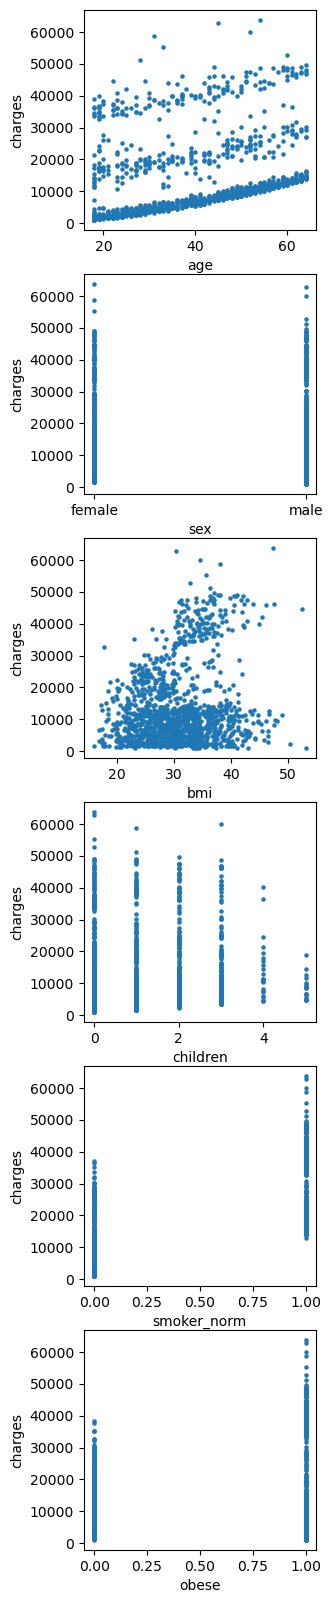

In [72]:
colnum=len(costdf.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,20))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in costdf.columns if i not in ["smoker","region","charges","sex_norm"]]):
    
    ax[ind].scatter(costdf[col],costdf.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

age :  0.29900819333064765
bmi :  0.1983409688336289
children :  0.06799822684790481
charges :  1.0
smoker_norm :  0.7872514304984775
obese :  0.19968322199588245


Text(0, 0.5, 'Absolute correlation')

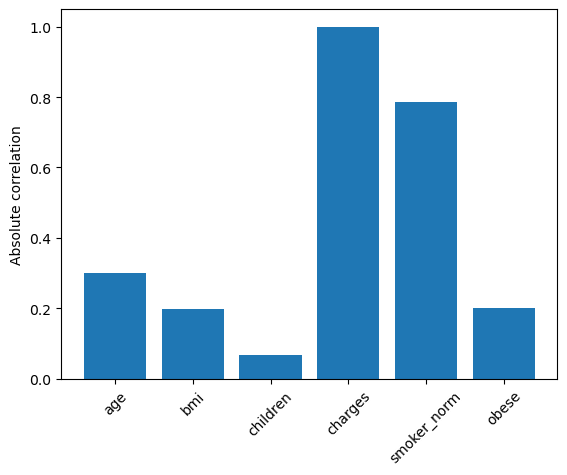

In [74]:
corr_vals=[]
collabel=[]
for col in [i for i in costdf.columns if i not in nonnum_cols]:
    
    p_val=sp.stats.pearsonr(costdf[col],costdf["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")

Exploratory Data Analysis


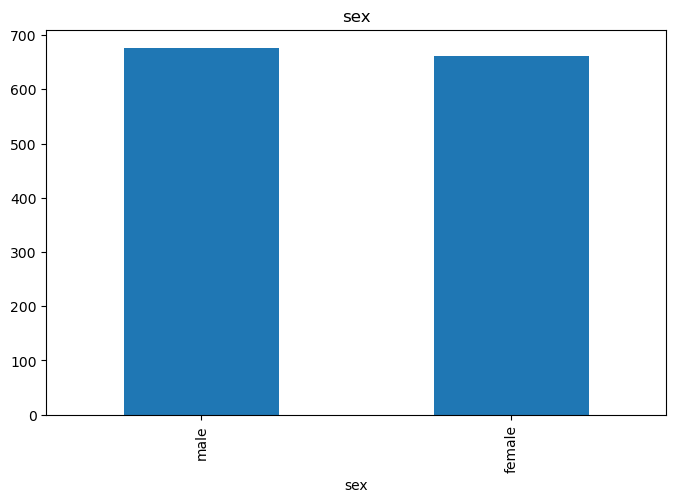

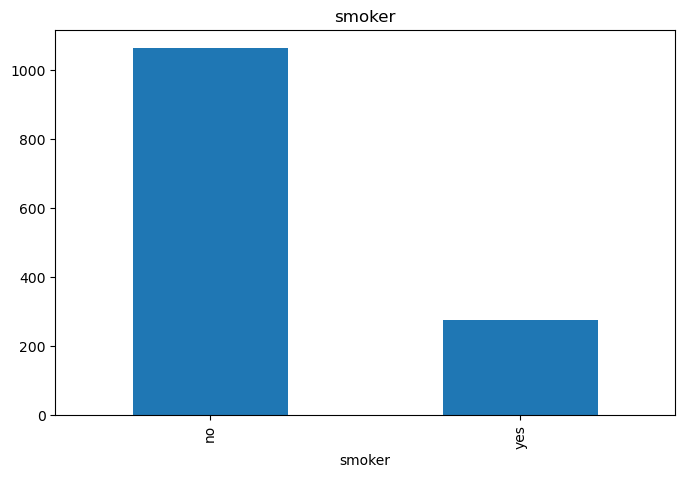

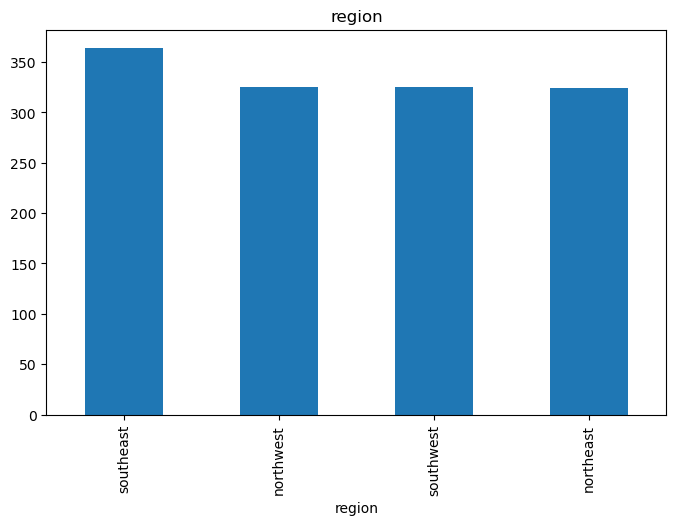

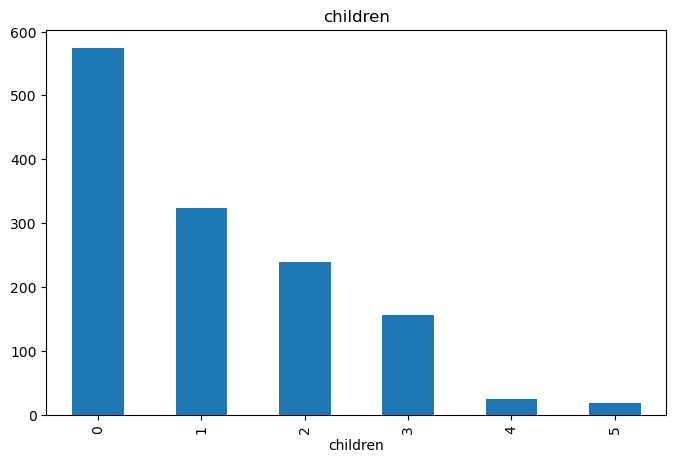

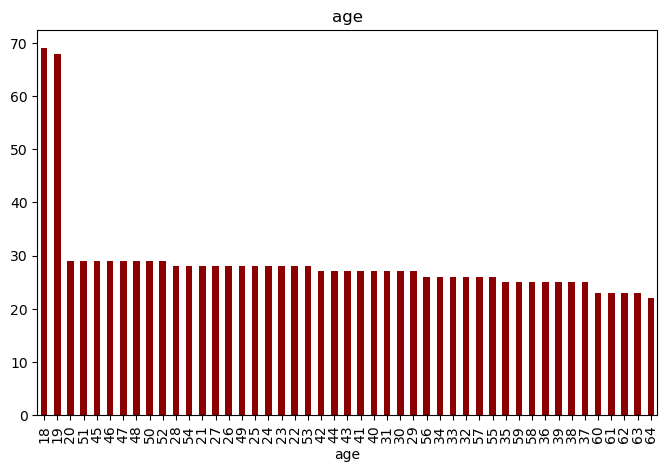

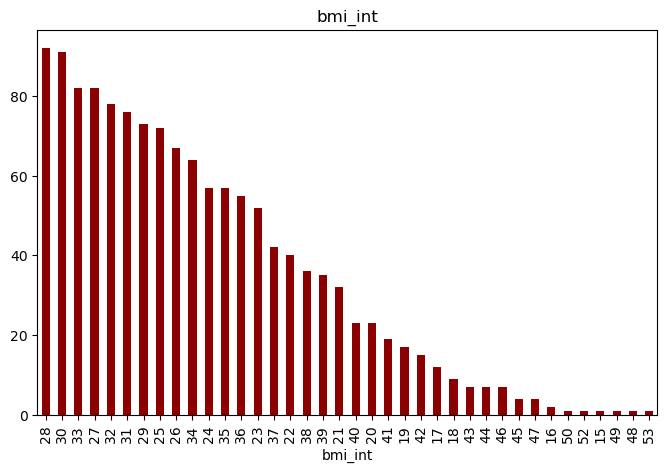

In [89]:
costdf['bmi_int'] = costdf['bmi'].apply(lambda x: int(x))
variables_1 = ['sex','smoker','region','children',]
variables_2 = ['age','bmi_int']

print('Exploratory Data Analysis')
for v in variables_1:
    costdf = costdf.sort_values(by=[v])
    costdf[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    fig=plt.gcf()
    fig.set_size_inches(8,5)
    plt.show()
for v in variables_2:
    costdf = costdf.sort_values(by=[v])
    costdf[v].value_counts().plot(kind = 'bar', color='darkred')
    plt.title(v)
    fig=plt.gcf()
    fig.set_size_inches(8,5)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Plot for Charges & Age')

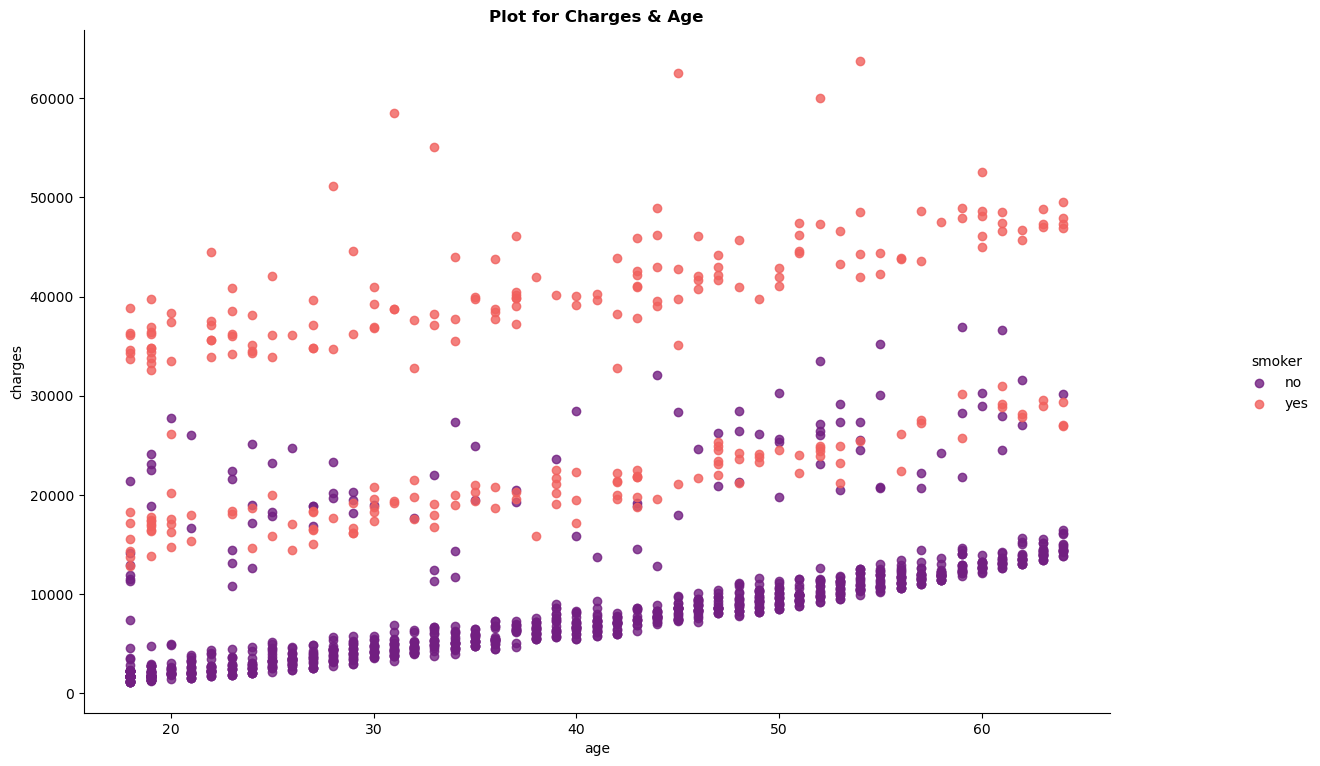

In [91]:
sns.lmplot(x='age', y='charges', hue='smoker', data=costdf,fit_reg=False,palette="magma")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & Age", weight="bold")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'function' object has no attribute 'set_size_inches'

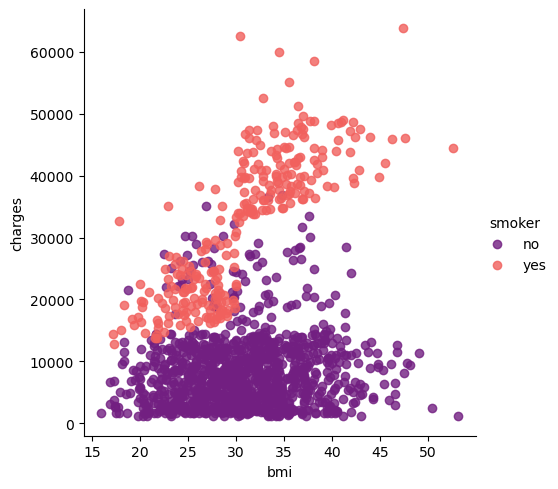

In [95]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data= costdf,fit_reg=False,palette="magma")
fig=plt.gcf
fig.set_size_inches(15,8)
plt.title("Plot for Charges & BMI", weight='bold')

AttributeError: 'function' object has no attribute 'set_size_inches'

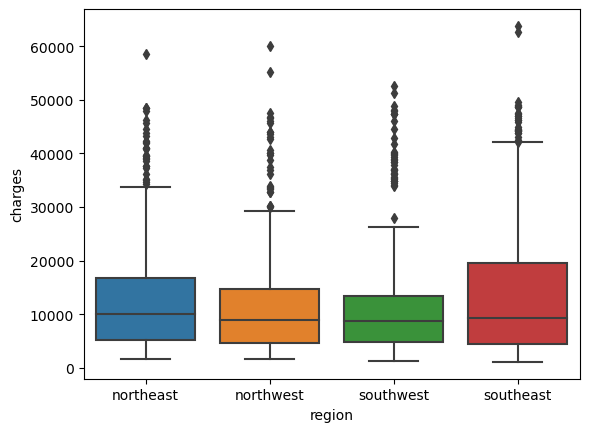

In [97]:
sns.boxplot(x="region", y="charges", data=costdf)
fig=plt.gcf
fig.set_size_inches(15,8)
plt.title("Plot for Charges & Region", weight='bold')

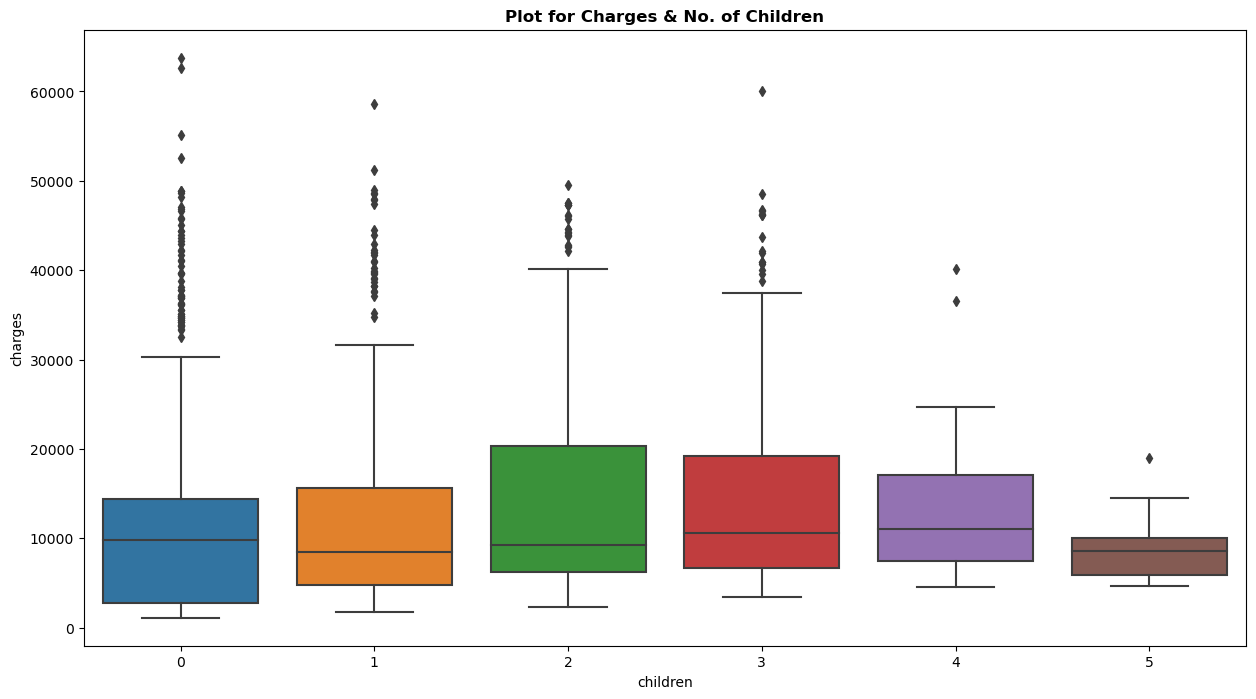

In [113]:
sns.boxplot(x="children", y="charges", data=costdf)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & No. of Children",weight='bold')
plt.show()

# Linear Regression

In [115]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='charges ~ bmi', data=costdf).fit()
print("coefficients:\n\n", lm.params)
print("\n Pvalues:\n\n", lm.pvalues)
print("\n R Squared:\n\n",lm.rsquared)

coefficients:

 Intercept    1192.937209
bmi           393.873031
dtype: float64

 Pvalues:

 Intercept    4.737685e-01
bmi          2.459086e-13
dtype: float64

 R Squared:

 0.03933913991786275


# Supoose increase of Bmi by 1 unit increases annual charges of $393.87

In [116]:
lm=smf.ols(formula='charges ~ smoker', data=costdf).fit()
print("coefficients:\n\n", lm.params)
print("\n Pvalues:\n\n", lm.pvalues)
print("\n R Squared:\n\n",lm.rsquared)

coefficients:

 Intercept         8434.268298
smoker[T.yes]    23615.963534
dtype: float64

 Pvalues:

 Intercept        1.581020e-205
smoker[T.yes]    8.271436e-283
dtype: float64

 R Squared:

 0.6197648148218988


# Suppose being a smoker increases charges by $23,615.96 annually

In [122]:
lm = smf.ols(formula='charges ~ bmi + sex + region + smoker +children+age', data=costdf).fit()
#lm = smf.ols(formula='charges ~ .', data=insuranceDF).fit()

print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)
print(lm.summary())


Coefficients: 

 Intercept             -11938.538576
sex[T.male]             -131.314359
region[T.northwest]     -352.963899
region[T.southeast]    -1035.022049
region[T.southwest]     -960.050991
smoker[T.yes]          23848.534542
bmi                      339.193454
children                 475.500545
age                      256.856353
dtype: float64

 Pvalues: 

 Intercept              5.579044e-32
sex[T.male]            6.933475e-01
region[T.northwest]    4.587689e-01
region[T.southeast]    3.078174e-02
region[T.southwest]    4.476493e-02
smoker[T.yes]          0.000000e+00
bmi                    6.498194e-31
children               5.769682e-04
age                    7.783217e-89
dtype: float64

 R Squared: 

 0.7509130345985207
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:            

In [123]:
dfTrain=costdf[:1238]
dftest=costdf[1238:1338]

In [134]:
lm_model=smf.ols(formula='charges~bmi + sex + region + smoker +children + age +  smoker',data=dfTrain).fit()
print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)
print(lm.summary())


Coefficients: 

 Intercept             -11938.538576
sex[T.male]             -131.314359
region[T.northwest]     -352.963899
region[T.southeast]    -1035.022049
region[T.southwest]     -960.050991
smoker[T.yes]          23848.534542
bmi                      339.193454
children                 475.500545
age                      256.856353
dtype: float64

 Pvalues: 

 Intercept              5.579044e-32
sex[T.male]            6.933475e-01
region[T.northwest]    4.587689e-01
region[T.southeast]    3.078174e-02
region[T.southwest]    4.476493e-02
smoker[T.yes]          0.000000e+00
bmi                    6.498194e-31
children               5.769682e-04
age                    7.783217e-89
dtype: float64

 R Squared: 

 0.7509130345985207
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:            